
# [CE-110] Lab 2: Analyzing Water Networks and Energy Use in CA

*Estimated Time: 45 minutes*


### Table of Contents:

**Part I: Visualizing Networks & Water Flow**
    
 1. [Visualizing the Network](#section_network)
 2. [Sankey Diagrams: Visualizing Water Flow](#section_sankey)

**Part II: Analyzing Energy Use across Years**
1. [Setting Up for Analysis](#section_setup)
2. [Diving In - Cerritos Example](#section_divein)
3. [Your Turn](#section_yourturn)
4. [Aggregating across All Utilities in California](#section_agg)

In this lab, we will be visualizing and analyzing water networks for specific utilities in CA. First off, we will simply visualize the network associated with you utility (i.e. the sources that lead into it). Then, we will analyze the flow of water in these networks and how they have changed over time. Finally, we will perform energy analysis calculations in order to see in more depth how the flow of water has changed and what effects this has had. At this time you should have been assigned a utility to visualize and analyze. Here is a mapping of utiliy names to their respective codes in the graphs and data.

Utility Code|Utility Name
-|-
1805003E|Alameda County Water District
1803033E|Fresno City of
1810019E|Hi-Desert Water District
1809027E|Palmdale Water District
1805085E|San Jose Water Company
1807341E|Santa Monica City of

<div class="alert alert-warning"> 

**QUESTION** cells are in blue and ask you to make graphs, answer conceptual questions, or do other lab tasks. To receive full credit for your lab, you must complete all **QUESTION** cells.

</div>


Note: There is a folder named "output" located in the same directory where you opened this lab. Currently it is empty, but later on you will call functions that will ouput to this folder and you will need to copy and paste that ouput to a link. Try to quickly locate that folder in the tab where you opened this lab.

To start off the lab, we have to import some tools for us to be able to select and visualize certain utilities. These tools will build graphs for us which show which water sources and which types of water are upstream from a certain utility. The tools will also enable us to perform energy analysis on the utilities.Therefore, just run the cell and this will set up our environment (this will take a minute to run).

In [46]:
# Run this cell! This will take a minute

!pip install -q pydot
!pip install -q ipywidgets
!pip install -q ipysankeywidget
!pip install -q widgetsnbextension
!jupyter nbextension enable --py --sys-prefix ipysankeywidget

from sub_network import subWESTnet
from datascience import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json, urllib, ast
import pydot
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

distributed 1.21.8 requires msgpack, which is not installed.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.7.0 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
distributed 1.21.8 requires msgpack, which is not installed.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.7.0 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
distributed 1.21.8 requires msgpack, which is not installed.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.7.0 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
distributed 1.21.8 requires msgpack, which 

# Part I: Visualizing the Network<a id='section_network'></a>

In this section, we will be completing our first task, which is to make a bare-bones visualization of our network. 
1. First run the cells of code and replace anything that it says to replace (Don't worry about understanding what the code does)
2. Then locate the output in the 'ouput' folder
3. Copy and Paste it, to the link found later on in this section which takes you to GraphViz.com

Here, we create what is called an instance of a graph object. This is what will enable us to be able to visualize the water network associated with a certain utility, all the sources and the types of water that are leading into it. We enter in the number 2010, because we will be looking at the your utility network for that year.

In [50]:
new_upstream_example = subWESTnet('data/fixed_times_erl.csv', 2010)

This line of code specifies that we want to look at all the sources upstream from the utility. The point of this is that we want to analyze what are the types of water coming into these utilities, how much is coming in, and from where is it coming. In the spot that has "Your Utility Name Here" put your **utility name** in the quotes. To see what your specific utility name is, look at the table at the top of this page and put that name specifically in the quotes. **Note: do not put your utility code in the text, put it's actual name there, if you make a spelling mistake, make sure to rerun the above cell because that will refresh the object we are using and allow us to run the below cell again**

In [51]:
new_upstream_example.upstream("Daly City City of")

Unweighted upstream graph built.


This line of code is here to compute all the amounts of water going into the different nodes in the network, all you have to do is run the following cell

In [52]:
new_upstream_example.balance_graph()

Graph is weighted.


The following attributes of our upstream example show the tables of the actual network (by using source and target labels) and the energies associated with each node in the graph. Just browse the tables and try to see what each column is referring to and how the rows relate certain utilities/sources with energy levels and the amount of water moving through each point in the network.

In [53]:
new_upstream_example.table()
new_upstream_example.energy

,node,kwh/af
0,WWT1805027,0.000000
1,WESTSIDE,0.000000
2,R_Tuolumn,0.000000
3,RES1805081,0.000000
4,1805027REC,108.000000
5,1805027NPD,344.000000
6,SW1805081SYS,0.000000
7,SW1805081EB,0.700000
8,SW1805081PEN,113.900000
9,1805027PD,237.744342


This folowing cell takes the upstream table, and turns it into a dot file. The dotfile is placed in a folder called 'ouptut'.

There are some things to note about the nodes in the graph. The ones that start with "R_" are a river, ones that contain "SWP" or "CVP" are parts the state and of federal government water management projects in CA, respectively, ones with "LK" are lakes, ones with "RES" are reservoirs, SW are unsepcified surface water sources, GW are groudwater aquifers. The nodes which contain your utility's code and then end with PD combine all treatable water while, NPD contains all non-potable sources flowing into your utility's distribution systems.

In [54]:
new_upstream_example.to_dot()

Go to the dot file (inside the ouput directory where the lab2 notebook is located) and paste the code in the dot file [here](https://dreampuf.github.io/GraphvizOnline/). Make sure to replace the entire code block that is already in the link with the entire code block in our output.dot files.

Here are the steps to get to the dotfile:
 - Go to the tab where you opened this lab, on datahub
 - In the same file directory, where this lab is located, there is a file called 'output'
 - Click on that folder and in it should be the dotfile with your utility name in the filename
 - Open that file and then copy and paste the entire contents of the file into the leftside of the page that the link brings you to
 
 
 <div class="alert alert-warning"> 

**QUESTION** What are some of the sources connected to your utility (which would be located at the bottom of the graph)?  **QUESTION** 

</div>

*YOUR ANSWER HERE*

## The Sankey Diagram: Visualizing Water Flow<a id='section_sankey'></a>

This next section assigns the task of visualizing our networks with a lot more information embedded into them. We will be looking at the water network associated with your utility but this time we will see how much water is actually flowing between certain nodes contained in the network. You will have to run some of the following ceels in order to again modify our environment and make everything work, as well as input your utility code to see the sankey diagrams which provide us with this useful visualization.

The next cell is quite complicated, don't bother with trying to understand what it is doing. All it does is try to format our network so that we can use something called a sankey diagram. This diagram will allow us to visualize the water network associated with our utility in a way which shows how much water is actually travelling between utilities and sources and other things like reservoirs, rivers, and aqueducts.

In [55]:

def get_sankey_file(data_path, year, utility, save_filepath):
    gi = subWESTnet(data_path, year)
    gi.upstream(utility)
    
    sank_dicts = []
    for v in gi.edges.values():
        sank_dict = {}
        if v['cumulative_volume_af'] <= 1:
            pass
        else:
            sank_dict['source'] = v['source']
            sank_dict['target'] = v['target']
            sank_dict['value'] = v['cumulative_volume_af']
            sank_dicts.append(sank_dict)
    
    df = pd.DataFrame(sank_dicts)
    data = pd.read_csv(data_path)
    data = data[data['year'] == year]
    
    nodes = []
    for i in df['source'].unique():
        sdict = {}
    
        # check if resource/end or not
        check_resource = data[data['target'] == i].shape
        if check_resource[0] == 0:
            sdict['is resource'] = True
        else:
            sdict['is resource'] = False
        if i[-1:] == 'E':
            sdict['is end'] = True
        else:
            sdict['is end'] = False
    
        # compute in/out volumes
        outv = df[df['source'] == i]['value'].sum()
        inv = df[df['target'] == i]['value'].sum()
    
        # get values to compensate for missing volumes
        extra_case = {}
        if outv < inv:
            if not sdict['is end']:
                extra_case['value'] = inv - outv
                extra_case['source'] = i
                extra_case['target'] = "Other"
                nodes.append(extra_case)
        elif outv > inv:
            if not sdict['is resource']:
                extra_case['value'] = outv - inv
                extra_case['source'] = "Other to " + i
                extra_case['target'] = i
                nodes.append(extra_case)
    
    extra_ = df.append(pd.DataFrame(nodes)).reset_index(drop=True)
    a = []
    count = 0
    break_count = 0
    
    while True:
        drop = []
        for i, r in extra_.iterrows():
            if extra_[extra_['source'] == r['target']].shape[0] == 0:
                if r['target'][-5:] != 'Other' and r['target'][-1:] != 'E':
                    drop.append(r['target'])
                if extra_[extra_['target'] == r['source']].shape[0] == 0:
                    drop.append(r['source'])
        
        extra_ = extra_.loc[[k for k, v in extra_.iterrows() if v['target'] not in drop]]
        count += len(drop)
        a.extend(drop)
        if count == len(a):
            break_count += 1
        if break_count == 15:
            break
    return extra_.to_csv(save_filepath, index=False)

Run the following cell but make sure to put **your utility's code, not its name**, in the quotes that say "Your Utility Code Here". Remember what all the different codes mean from the previous graph we made. These encodings still apply to the Sankey graph we are going to make in the following cells, except this time your utility will be on the right hand side of the sankey diagram encoded by its utility code, not it's actual name. The graph below represents the flow of water involved with this utility in the year 2010.

In [56]:
get_sankey_file('data/links_erl.csv', 2010, '1805027E', './output/utility2010.csv')

Unweighted upstream graph built.



Next we are going to save this table as a csv in order to visualize the diagram on a website [here](https://jasonsjiang.github.io/sankey). The following line will save a file called 2010_sankey.csv to the output folder where your dot file was saved previously. This time you will follow these steps to visualize the graph:

### Sankey Instructions <a id='sankey_instructions'></a>
1. Run the cell below
2. Go to the output folder on datahub, where you were before
3. Click on the small checkbox to the left of your file
4. After that happens, a few options will appear at the top of the directory, click on the download option
5. This will download the file to your downloads folder on your computer
6. Go to the website linked above
7. Click on the 'Choose file' button
8. Choose the csv file, 2010_sankey.csv

<div class="alert alert-warning"> 

**QUESTION** Examine the graph. Your utility should be on the right hand side and the sources that have water flowing into it to the left of it. You can run your mouse over the graph and see how much water is flowing in each connection. How much water of each type is flowing directly into your utility?

</div>

*YOUR ANSWER HERE*

The next graph we are making is the predicted flow of water associated with your utility in 2015. These predictions were made in 2010. Make sure to fill in the "Your Utility Code Here" portion of the cell, so that it can be run, and use your utiliy's code just like in the last Sankey Diagram you made. You will follow the same steps you did for the last sankey diagram in order to visualize it. You will want to have multiple tabs open in order to compare the different sankey diagrams. [Here](#sankey_instructions) are the directions again.

In [57]:
table_2015_predicted = get_sankey_file('data/links_erl.csv', 2015, '1805027E', './output/utility_predicted2015.csv')

Unweighted upstream graph built.


Finally the last graph is the actual 2015 flow of water associated with your utility. We are going to zoom into just the portion that contains your utility and the types of water going into it. Make sure to fill in the "Your utility code here" part of the cell. Again, follow the same steps as before, and you will want to have another tab open for the actual 2015 sankey diagram.

In [58]:
table_2015_actual = get_sankey_file('data/links_2015module.csv', 2015, '1805027E', './output/utility2015.csv')

Unweighted upstream graph built.


<div class="alert alert-warning"> 

**QUESTION** Examine the two graphs above and look at the direct connections to your utility. How much water of each type seems to be flowing into your utility in both the predicted 2015 data and the actual 2015 data? How do these levels of water flow compare to 2010 and how do they compare to each other. Do the tyes of water flowing into your uility change at all? Given the change in the flow of water between 2010 and 2015 and how 2015 compares with what was predicted are there any recent events in California which might explain these differences?

</div>

*YOUR ANSWER HERE*

# Part II: Analyzing Energy Use across Years

At this point, you have **visualized** the utility network as well as water flow from immediate sources. Now that you have a picture of what your water system looks like, we will dig into **energy analysis**. In particular, we will:
1. **Analyze** how energy use in your assigned utility changed from 2010 to 2015 (actual 2010 vs. actual 2015)
2. **Assess** how well energy use in 2015 was predicted back in 2010 (predicted 2015 vs. actual 2015)
3. **Aggregate** all utilities and look at the overall energy consumption trend in California

We will cover a majority of the content of this notebook in class, but discussion questions and analysis for your own utility is designed for you to do on your own.



## A. Setting up for Analysis<a id='section_setup'></a>
In this section, we will first understand the structure of the data then filter the data by a specific utility code to create a table that only contains the one utility as a target. Then we will look at both the volume of water transported and total energy transmitted across the different years in a table format. 

### 1. Understanding the Data

Our data is stored in a CSV file called `network.csv`. Run the following cell to read it in.


In [59]:
network = Table().read_table('./data/network.csv')
network

year,source,target,cumulative_volume_af,transmission_kwh/af
2010,1801001PD,1801001E,1624,163.1
2010,1801007PD,1801007E,2015.2,163.1
2010,1801009PD,1801009E,2924.55,163.1
2010,1801011PD,1801011E,1350,163.1
2010,1801015PD,1801015E,840,163.1
2010,1801017PD,1801017E,1798.34,163.1
2010,1801019PD,1801019E,1414.56,163.1
2010,1801021NPD,1801021E,710,195.72
2010,1801021PD,1801021E,3098.08,163.1
2010,1801023NPD,1801023E,204,195.72



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #fff8f0; ">

**Here is a breakdown of what the columns mean:**
1. **`year`**: the year corresponding to the water transport and energy use measurement. There are 3 possible values for this column:
    - 2010: actual data collected from the year 2010
    - 2015: actual data collected from the year 2015
    - Predicted 2015: predictions made in 2010 for 2015

2. **`source`**: contains sources of water, or where the water is transported _from_. Contains any water source that provides water to those target utilties.

3. **`target`**: contains the utility code receiving water from its source. Contains only water utilities. 

4. **`cumulative_volume_af`**: shows the total amount of volume transported from source and target (measured in acre-feet)

5. **`transmission_kwh/af`**: shows the amount of energy used during the transmission, where kWh/AF = kiloWatt-hours required to pump **one acre-foot** of water through the irrigation system. 
</div>
Note that each row contains information on water flow and energy use between a water source and its target (utility).


#### ***Creating Total Energy (kWh) Metric

Notice that we have the pieces we need to calculate the **total amount of energy** consumed to transport the recorded acre feet of water: all we have to do is to multiply the two columns together. The code below calculates this new total energy metric, saves it as the variable `total_energy_kwh`, and adds a column called "total_energy_kwh" onto the `network` table.

Notice the addition of this 6th column `total_energy_kwh`, which shows the total amount of energy used during the transmission of the total volume of water, where kWh = kiloWatt-hours of electricity required to pump all the water through the irrigation system.

In [60]:
# Creating the new metric: total energy (kwh) by multiplying the two 
total_energy_kwh = network.column('transmission_kwh/af') * network.column('cumulative_volume_af')

# 
network = network.with_column("total_energy_kwh", total_energy_kwh)
network

year,source,target,cumulative_volume_af,transmission_kwh/af,total_energy_kwh
2010,1801001PD,1801001E,1624,163.1,264874
2010,1801007PD,1801007E,2015.2,163.1,328679
2010,1801009PD,1801009E,2924.55,163.1,476994
2010,1801011PD,1801011E,1350,163.1,220185
2010,1801015PD,1801015E,840,163.1,137004
2010,1801017PD,1801017E,1798.34,163.1,293309
2010,1801019PD,1801019E,1414.56,163.1,230715
2010,1801021NPD,1801021E,710,195.72,138961
2010,1801021PD,1801021E,3098.08,163.1,505297
2010,1801023NPD,1801023E,204,195.72,39926.9


### 2.1. Filtering by Utility: Daly City Example
You can see in the data above that there are various utility codes, but we really only want to look at your one assigned utility drill in and start analyzing your utility's energy consumption. To help you get set up for your own utility analysis, we will use the Daly City Utility (1805027E) as an example. Follow along closely, and you will be able to follow the steps here to conduct your own utility analysis.

With the Sankey Diagram, you were able to visualize how much water was transferred from each water source directly connected to a utility in various years. We can display this information compactly in a table for **a single target utility** across each of the three year values: 2010, 2015 and Predicted 2015.

You can use the **`.where()`** table function to obtain a table of records that show all water sources that flow to a specific utility. Recall that the **`where`** function allows us to choose certain rows based on two arguments:
- The name of column to filter on
- A condition that entries in the selected column should match, called the _predicate_ 

In other words, we call the `where` function like so: `table_name.where(column_name, predicate)`

Run the following cell to filter the data such that the target column only contains the Daly City Utility Code, then set this new filtered table to the variable `daly_city`.

In [61]:
daly_city = network.where('target', are.equal_to('1805027E'))
daly_city

year,source,target,cumulative_volume_af,transmission_kwh/af,total_energy_kwh
2010,1805027NPD,1805027E,547,381.84,208866
2010,1805027PD,1805027E,4130.19,318.2,1.31423e+06
2010,GWR1805-2-35,1805027E,2204,318.2,701313
2015,1805027NPD,1805027E,853.151,381.84,325767
2015,1805027PD,1805027E,6730.38,636.4,4.28321e+06
Predicted 2015,1805027NPD,1805027E,3103,381.84,1.18485e+06
Predicted 2015,1805027PD,1805027E,6199.32,318.2,1.97262e+06


**What do you notice looking at this table?**

Notice that the target column is now set to the Daly City utility. Under the `year` column, there are two entries for each of the year values 2015 and predicted 2015, and three entries for 2010 (although this will vary depending on which utility you are assigned). Let's focus on the two non-ground water sources: 1805027PD and 1805027NPD.

Do you see anything different between 2015 and  Predicted 2015 data for Daly City utility? Notice that the transmission (energy) per acre foot **doubled** in actual 2015 -- it became more energy costing / expensive to transport water from this source.  Notice also that the `cumulative_volume_af` column from this more expensive source increased, while water volume transported from the less expensive 1805027NPD source decreased. These **magnitudes** of increases / decreases will be our core focus throughout the lab as we look at the total energy and volume increased between the year 2010 and 2015. 

*Keep eye on on not just whether values increase or decrease, but also on **how much** it increases/decreases*

### 2.2. Try it out on your own Assigned Utility:
Generate the same table for your assigned utility using the `.where()` function and answer the discussion question below.

In [ ]:
# Generate a table containing only water sources that connect directly to your utility
# Name this new table "my_utility"
my_utility = network.where(...)
my_utility

**QUESTION 1**: Do you see anything different between 2010 and 2015 data for your utility? How about 2015 and Predicted 2015? Explain. 

*YOUR ANSWER HERE*

## B. Diving into Analysis -- Daly City Example<a id='section_divein'></a>
Time to dig for some insight from our data!

For each year, we will calculate the **total** cumulative volume of water that enters a utility, as well as the **total** energy consumed by the utility to intake that volume of water. We'll then visualize these values across the three different years in a barplot to visualize the differences in these values. 

#### Useful Functions -- Recap from Introduction Notebook

In order to do our analysis, we will need to know the following table functions. You've seen this before in the Intro to Jupyter notebook -- refer back to the [Introduction Notebook](https://tinyurl.com/y5btm2gs) if you need a deeper review of the functions!

1. **`.select()`**:
    - Input: the column names of a table you want to SELECT. If multiple, separate names with commas.
    - Output: a table CONTAINING just those specified columns
    - Format: `table_name.select("column_name1", "column_name2", ...)`
    

2. **`.drop()`**:
     - Input: the column names of a table you want to DROP. If multiple, separate names with commas.
    - Output: a table with all columns EXCEPT those specified columns
    - Format: `table_name.drop("column_name1", "column_name2", ...)`
    

3. **`.column()`**: 
    - Input: the column name of a table
    - Output: the values of the specified column as an array
    - Format: `table_name.column("COLUMN NAME IN QUOTES")`
    
---

#### And another Useful Function: `.group()`

4. **`.group()`**:
    - Inputs:
        - Column name (in quotes)
        - action you want to take across all groups in the column (ex. `sum`, `np.mean`, etc)
    - Output: A Table with each row corresponding to a unique value (group) in the specified column, and a column containing the aggregated value for each group based on the specified action.
    - Format: `table_name.group("COLUMN NAME IN QUOTES", action)`


In most cases, the columns of your table can be thought of as **categories**: a subject's preferred gender, level of education, area of study, etc. When we have lots of data collected for each category, we often want to calculate "summary statistics" on them to understand how each category differ from one another. This summary statistic could be as simple as the total number (sum) of values recorded for each category, which is what we will use in this class. You'll see what we mean in a second: run the following cell to output a table of snacks!


In [62]:
# Don't worry about the code here -- simply run this cell!
snacks = Table().with_columns("Item", make_array("Oreo", "Cupcake", "Ice Cream", "Oreo", "Cupcake", "Ice Cream"),
                    "Flavor", make_array("Vanilla", "Chocolate", "Vanilla", "Chocolate", "Vanilla", "Chocolate"),
                    "Number", make_array(6, 3, 2, 10, 3, 6))

snacks

Item,Flavor,Number
Oreo,Vanilla,6
Cupcake,Chocolate,3
Ice Cream,Vanilla,2
Oreo,Chocolate,10
Cupcake,Vanilla,3
Ice Cream,Chocolate,6


In this example, it is easy to identify the categories. The `Item` column has three categories "Oreo", "Cupcake" and "Ice Cream", while the `Flavor` column has two categories "Vanilla" and "Chocolate". The `Number` column contains the number of each Item/Flavor combination you have.

If you wanted to calculate the **how many of each Flavor you have**, how would you do it? In this small table, it's easy to pick out the Number associated with each Chocolate Flavor and add them up: $3+10+6=19$ and then pick out the Number associated with each Vanilla Flavor and add them up: $6+2+3=11$. However, this gets extremely tedious very fast as the number of rows in a table get larger and larger. That's where the `.group()` function comes in.


**`.group("column_name", function)`** takes in two inputs:

    - the column with the categories you want to "group"
    - an "aggregation function", or what you want to calculate from the values of each category
    
For our purposes, the only aggregation function we will be using is `sum`.
It will then output a table with the desired calculation for each unique group. Because the functions takes the sum of all values across all tables, you will notice that not all columns will have values: if a column doesn't contain numerical values, then it cannot add so it will simply leave it blank.

<img src="images/Group.PNG" width="800" height="800">


In [ ]:
# Run me!
snacks.group('Flavor', sum)

<div class="alert alert-info">
<b>PRACTICE:</b> How many total of each Snack Item are there? I.e. How many total Oreos, total ice creams, and total cookies do you have?
    </div>

In [ ]:
# YOUR CODE HERE (OPTIONAL)

---

### 1. Calculating the Total Amount of Transported Water & Used Energy
Let's calculate the total amount of transported water and used energy in each table using the `.group()` function. The code is provided for you below -- briefly explain what the `.group()` function below did to our data Table. We'll set this new table to `daly_city_sum`.

In [63]:
daly_city_sum = daly_city.group('year', sum)
daly_city_sum

year,source sum,target sum,cumulative_volume_af sum,transmission_kwh/af sum,total_energy_kwh sum
2010,,,6881.19,1018.24,2.22441e+06
2015,,,7583.53,1018.24,4.60898e+06
Predicted 2015,,,9302.32,700.04,3.15747e+06


Compare the new grouped table to the original `daly_city` Table. What did the `.group()` function do? What do the columns `cumulative_volume_af sum` and `total_energy_kwh sum` contain?

*YOUR ANSWER HERE*

### 2.  Bar Graphs: Visualizing Differences in Total Tranported Water / Used Energy
It's difficult to effectively compare all of these numbers separately. Let's make a **barplot** here to visualize the magnitude of these differences! In particular, we want to understand how energy use in 2015 compares to energy use in 2010 *as well as* how much energy was predicted to be used in 2015.

As we saw int he Introduction Notebook, we can call the `.bar()` method on a table to plot a barplot as long as the Table contains appropriate columns. For example, if we want to plot a bar plot with Years on the x-axis and Total Energy (kwh) on the y-axis, we want to make sure we construct a table that **only** contains those two columns. We can do this with either the `.select()` or `.drop()` function!

We will plot two barplots -- one for energy and one for water so that we can make each respective barplots. **Use the appropriate function to construct the two tables `daly_city_energy` and `daly_city_water`** such that we can call `.bar()` as we have in the Introduction Notebook. The `daly_city_sum` table is provided below as reference to what columns you need to select / drop.

In [ ]:
daly_city_sum

In [64]:
daly_city_energy = daly_city_sum.select('year', 'total_energy_kwh sum')

daly_city_water = daly_city_sum.select('year', 'cumulative_volume_af sum')

Now that you have the necessary tables, you call the `.bar()` method to plot the barplot! The code cell below plots **both** energy and water plots: fill in appropriate code in the two places indicated. Don't worry about the rest of the code -- they are there only for the aesthetics.

In [65]:
daly_city_energy

year,total_energy_kwh sum
2010,2.22441e+06
2015,4.60898e+06
Predicted 2015,3.15747e+06


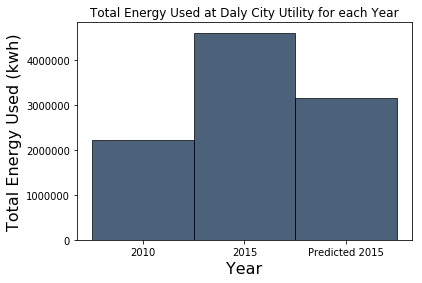

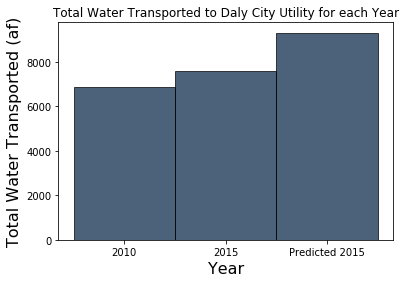

In [66]:
#graph showing total amount of energy used in actual 2010, predicted 2015, and actual 2015

daly_city_energy.bar('year')

plt.ylabel('Total Energy Used (kwh)')
plt.xlabel('Year')
plt.title('Total Energy Used at Daly City Utility for each Year')
plt.xticks(np.arange(3), daly_city_sum.column('year'))
plt.xticks(np.arange(0, 3, step=1));


#graph showing total amount of water transported in actual 2010, predicted 2015, and actual 2015

daly_city_water.bar('year') #YOUR CODE HERE

plt.ylabel('Total Water Transported (af)')
plt.xlabel('Year')
plt.title('Total Water Transported to Daly City Utility for each Year')
plt.xticks(np.arange(3), daly_city_sum.column('year'))
plt.xticks(np.arange(0, 3, step=1));


In the two bar graphs plotted above, we can see that in the actual year of 2015, the amount of energy used was significantly higher than both 2010 and what was predicted for 2015. On the other hand, the total volume of transported water in actual 2015 was **lower** than predicted 2015 value. How could this be, and what could this imply? Somehow, the Daly City utility's total electricity usage increased dramatically even though they weren transporting **less** water.

To get a better understand of the difference in magnitudes of such increases, let's calculate just how much energy and water volume increased between 2010 and 2015, as well as predicted 2015 and 2015.

### 3. Calculating Percent Change


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #fff8f0; ">

**Percent Change** allows us to understand how much a value changed relative to its original value. For example:
- If I have 2 apples and gained 1 apple for a total of 3 apples, my percent change would be (3-2)/2 = 0.5 which is a 50% increase in the number of apples. 
- On the other hand, if I started off with 10 apples and gained one apple for a total of 11 apples, my percent change would be (11-10)/10 = 0.1 which is only a 10% increase in the number of apples. 

</div>
As you can see, percent changes signify how *significant* the change is relative to what the original value was. The formula is as follows:

$$PercentChange = \dfrac{NewValue - OriginalValue}{OriginalValue} * 100$$

#### Energy: What is the percent change of energy used between 2010 and 2015?
By subtracting the total amount of energy used between 2015 and 2010, divide by the total amount of energy in 2010, then multiply by 100, we can get the percentage increase in total amount of energy between 2010 and 2015.

**Step 1:** In the first code block, **extract the 2010 total energy (original value)** and **2015 total energy (new value)**, and set the values to `original_energy2010` and `new_energy2015`, respectively.

*Hint: use `.where()` and `.column()`


In [67]:
# Run this cell to display the grouped daly city table again
daly_city_sum

year,source sum,target sum,cumulative_volume_af sum,transmission_kwh/af sum,total_energy_kwh sum
2010,,,6881.19,1018.24,2.22441e+06
2015,,,7583.53,1018.24,4.60898e+06
Predicted 2015,,,9302.32,700.04,3.15747e+06


In [68]:
original_energy2010 = daly_city_sum.where('year', are.equal_to('2010')).column('total_energy_kwh sum')

new_energy2015 = daly_city_sum.where('year', are.equal_to('2015')).column('total_energy_kwh sum')

**Step 2:**  Using the variables above, fill in the '...' below to calculate the Percent Change!

In [69]:
original_energy2010

array([2224405.738])

In [70]:
new_energy2015

array([4608979.63354863])

In [71]:
(new_energy2015 - original_energy2010)/original_energy2010 * 100

array([107.20049202])

#### Water: What is the percent change of cumulative volume of water transported between 2010 and 2015?
Now let's look at how much total volume increased between year 2010 and 2015 -- same set up as above, except the 2010 total volume (original value) is saved in `original_water2010` and 2015 total volume (new value) is saved as `new_water2015`.

**Step 1:** Extract the data

In [72]:
daly_city_sum

year,source sum,target sum,cumulative_volume_af sum,transmission_kwh/af sum,total_energy_kwh sum
2010,,,6881.19,1018.24,2.22441e+06
2015,,,7583.53,1018.24,4.60898e+06
Predicted 2015,,,9302.32,700.04,3.15747e+06


In [73]:
original_water2010 = daly_city_sum.where('year', are.equal_to('2010')).column('cumulative_volume_af sum')

new_water2015 = daly_city_sum.where('year', are.equal_to('2015')).column('cumulative_volume_af sum')


**STEP 2:** Calculate the Percent Change

In [74]:
# YOUR CODE HERE
(new_water2015 - original_water2010)/original_water2010*100

array([10.20664691])

**Question:** Compare the percent changes between Energy and Water. Is this consistent with what we saw in the bargraphs?

*YOUR ANSWER HERE*

## Discussion Questions

**Question:** What do you think caused a significant increase in usage of energy and volume of water between 2010 and 2015?

TYPE YOUR ANSWER

**Question:** What are the differences you can find between actual 2015 data and predicted 2015 data?

TYPE YOUR ANSWER

**Question:** Can you connect information found through the energy flow chart and the analysis done with Daly City Water Utility?

TYPE YOUR ANSWER

**Hypothesis:** The most likely cause of this phenomenon is the **drought** that dried out the state of California beginning in 2011. We can see in the original `daly_city` Table that the amount of energy it takes to transport **one** acre field of water from the same source to the utility stayed the same for one source but doubled for another. Despite, this, the amount of water tranported from this more expensive source **increased** while volume transported from the less expensive source **decreased**. We also observed that the total volume of water transported was **less** in 2015 than predicted, yet the total energy cost was dramatically higher than what we saw in 2010 and Predicted 2015. 

With all of this in mind, we can see that the Daly City utility had to rely more on the previously lesser used, more expensive water source to keep up with demand during this period of water shortage!


## C. Your Turn!<a id='section_yourturn'></a>

Now that we've gone through an example analysis with the Cerritos Utility, you can follow the same steps to dig into your assigned utility.

To make the process easier, let's reload the data tables for your own utility in actual 2010, predicted 2015 and actual 2015 that you found above!

Recall that you've already filtered the dataset using the `.where()` function to create a water systems Table that contains **only** your water utility as the target. Run the cell below to see what your data looks like.

In [ ]:
my_utility

### 1. Calculating the Total Amount of Transported Water & Used Energy
Use the `.group()` function to calculate the total amount of transported water and used energy in each table.
Set this new table to `my_utility_sum`.

In [ ]:
my_utility_sum = ...

### 2.  Bargraphs: Visualizing Differences in Total Tranported Water / Used Energy

Let's visualize the volume of transported water and consumed energy for your utility. Just like before, construct the two Tables necessary to plot the two barplots. Fill in the '...' in the following cells:

In [ ]:
my_utility_energy = ...


In [ ]:
my_utility_water = ...


In [ ]:
#graph showing total amount of energy used in actual 2010, predicted 2015, and actual 2015

my_utility_energy... #YOUR CODE HERE

plt.ylabel('Total Energy Used (kwh)')
plt.xlabel('Year')
plt.title('Total Energy Used at Cerritos Utility for each Year')
plt.xticks(np.arange(3), cerritos_sum.column('year'))
plt.xticks(np.arange(0, 3, step=1));

#graph showing total amount of water transported in actual 2010, predicted 2015, and actual 2015

my_utility_water... #YOUR CODE HERE


###*** Do Not Change ***###
plt.ylabel('Total Water Transported (af)')
plt.xlabel('Year')
plt.title('Total Water Transported to Cerritos Utility for each Year')
plt.xticks(np.arange(3), cerritos_sum.column('year'))
plt.xticks(np.arange(0, 3, step=1));


**Question:** What do you notice? Describe your barplots. Is it similar to what you saw with the Cerritos Example? Explain.

*YOUR ANSWER HERE*

### 3. Calculating Percent Change

Let's look at how much energy increased between year 2010 and 2015 for both energy and water. The steps here are exactly the same as you saw with the Cerritos example. **Fill in the '...' in the following code blocks to calculate the Percent Change!**

#### Energy: What is the percent change of energy used between 2010 and 2015?

In [ ]:
original_energy2010 = my_utility_sum.where('year', are.equal_to('2010')).column('total_energy_kwh sum')[0]
new_energy2015 = my_utility_sum.where('year', are.equal_to('2015')).column('total_energy_kwh sum')[0]

...

#### Water: What is the percent change of cumulative volume of water transported between 2010 and 2015?

In [ ]:
original_water2010 = my_utility_sum.where('year', are.equal_to('2010')).column('cumulative_volume_af sum')[0]
new_water2015 = my_utility_sum.where('year', are.equal_to('2015')).column('cumulative_volume_af sum')[0]

...

**Question:** Compare the percent changes between Energy and Water. Is this consistent with what we saw in the bargraphs?

*YOUR ANSWER HERE*

**Question:** How do your percent changes compare to what we saw with the Cerritos Utility? Does it demonstrate a similar trend? Does it support the hypothesis stated above that the drought might be at the root of the percent changes that you observe?

*YOUR ANSWER HERE*

# Part III: Aggregating across All Utilities in California<a id='section_agg'></a>

At this point, we have zoomed into one specific utility at a time and analyzed its water system. Let us now aggregate **all** utilities together and conduct a similar analysis to what we have seen on this aggregation of volume of water tranported as well as energy consumed for 2010, 2015 and predicted 2015.

In [ ]:
network

In [ ]:
#Group by the year column to collect cumulative data for actual 2010, actual 2015, and predicted 2015 data.
all_utilities_sum = network.group('year', sum)
all_utilities_sum

### Barplot:

In [ ]:
#graph showing total amount of energy used in actual 2010, predicted 2015, and actual 2015

all_utilities_sum.select('year', 'total_energy_kwh sum').bar('year')

plt.ylabel('Total Energy Used (kwh)')
plt.xlabel('Year')
plt.title('Total Energy Used at Cerritos Utility for each Year')
plt.xticks(np.arange(3), cerritos_sum.column('year'))
plt.xticks(np.arange(0, 3, step=1));


#graph showing total amount of water transported in actual 2010, predicted 2015, and actual 2015

all_utilities_sum.select('year', 'cumulative_volume_af sum').bar('year')

plt.ylabel('Total Water Transported (af)')
plt.xlabel('Year')
plt.title('Total Water Transported to Cerritos Utility for each Year')
plt.xticks(np.arange(3), cerritos_sum.column('year'))
plt.xticks(np.arange(0, 3, step=1));


**Question:** What can you make of the graph above? Is this similar to what you have seen so far? How does your utility's bar plot compare to this one?

*YOUR ANSWER HERE*

### Ratio of Energy Consumption to Volume of Water Transported

One way to summarize the trend demonstrated in the two barplots above is to calcualte the **ratio of total energy consumption to the tota volume of water transported** across the three years. To do this is simple: we simply divide the Total Energy sum column by the transmission_kwh/af sum column. This is done for you in the following code cell -- simply run the cell and observe the outputted table.

In [ ]:
#Ratio
ratios = all_utilities_sum.column('total_energy_kwh sum') / all_utilities_sum.column('cumulative_volume_af sum')
all_utilities_sum = all_utilities_sum.with_column('Ratio: Energy per Volume', ratios)
all_utilities_sum


This ratio essentially tells you how "expensive" it was to transport water from a source to a target utility in each respective year. Notice that the ratio stayed pretty much the same between 2010 and Predicted 2015, but the number is over 3.5 times as large for actual 2015. This gives you an idea of just how significantly the drought affected water systems in California.

**Question**: Is this consistent with what you have seen so far? Does this support the Drought Hypothesis? 



*YOUR ANSWER HERE*

---

### PLEASE FILL OUT THIS FEEDBACK FORM!

The Modules Teams at the Data Science Education Program build data science labs like these for many, many classes across campus. Please help us improve the structure and content of our modules for future iterations!! [The survey form is linked here](https://goo.gl/forms/kHj3jQapNwP4l5Mf2) -- thank you!


### Peer Consulting:

If you had trouble understanding the concepts above, there are resources set in place to help! **Data Science Peer Consulting** offers office hours run by Data Science students on the **3rd floor of Moffitt Library**. Meet the peer consultants and [view their office hours schedule here](https://data.berkeley.edu/education/data-peer-consulting). They are a great resource, so take advantage of their expertise!

*Authors: Jason Webb, Mina Kim, Keiko Kamei*